#### SetUp Git

In [1]:
!git clone https://github.com/seepala98/ERA.git
!git pull

Cloning into 'ERA'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 15 (delta 1), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (15/15), 5.01 KiB | 5.01 MiB/s, done.
Resolving deltas: 100% (1/1), done.
fatal: not a git repository (or any of the parent directories): .git


In [1]:
from __future__ import print_function
import sys
sys.path.append("/content/ERA/Session_7")
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from utils import load_mnist_data, preview_batch_images, plot_statistics
from model import model_1_Net, model_summary, train_model, test_model

In [2]:
use_cuda = torch.cuda.is_available()
device = torch.device('cuda' if use_cuda else 'cpu')
model = model_1_Net().to(device)
model_summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]              90
              ReLU-2           [-1, 10, 26, 26]               0
            Conv2d-3           [-1, 16, 24, 24]           1,440
              ReLU-4           [-1, 16, 24, 24]               0
            Conv2d-5           [-1, 16, 22, 22]           2,304
              ReLU-6           [-1, 16, 22, 22]               0
         MaxPool2d-7           [-1, 16, 11, 11]               0
            Conv2d-8           [-1, 10, 11, 11]             160
              ReLU-9           [-1, 10, 11, 11]               0
           Conv2d-10             [-1, 16, 9, 9]           1,440
             ReLU-11             [-1, 16, 9, 9]               0
           Conv2d-12             [-1, 16, 7, 7]           2,304
             ReLU-13             [-1, 16, 7, 7]               0
           Conv2d-14             [-1, 1

In [3]:
train_transforms=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,),(0.3081,))
])

test_transforms=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,),(0.3081,))
])

In [4]:
train_data, test_data = load_mnist_data(train_transforms, test_transforms)

In [5]:
torch.manual_seed(1)
batch_size = 128
kwargs = {'num_workers': 2, 'pin_memory': True} if use_cuda else {}
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle = True, **kwargs)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size, shuffle = True, **kwargs)

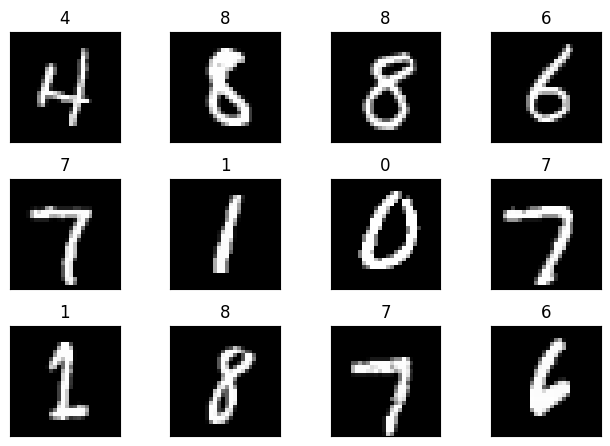

In [6]:
preview_batch_images(train_loader)


In [7]:
model = model_1_Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
train_losses = []
test_losses = []
train_acc = []
test_acc = []
for epoch in range(1,20):
    print(f"epoch: {epoch}")
    train_model(model, train_loader, device, optimizer, train_acc, train_losses)
    test_model(model, test_loader, device, test_acc, test_losses)

epoch: 1


loss=2.3022403717041016, batch_id = 468 Accuracy= 11.34: 100%|██████████| 469/469 [00:15<00:00, 30.81it/s]


/n Test set: Average loss: 2.3024, Accuracy: 1107/10000 (11.07%)

epoch: 2


loss=2.2957160472869873, batch_id = 468 Accuracy= 11.89: 100%|██████████| 469/469 [00:15<00:00, 29.98it/s]


/n Test set: Average loss: 2.2942, Accuracy: 1016/10000 (10.16%)

epoch: 3


loss=0.522943913936615, batch_id = 468 Accuracy= 62.27: 100%|██████████| 469/469 [00:15<00:00, 30.63it/s]


/n Test set: Average loss: 0.5221, Accuracy: 8353/10000 (83.53%)

epoch: 4


loss=0.48248085379600525, batch_id = 468 Accuracy= 83.71: 100%|██████████| 469/469 [00:19<00:00, 24.23it/s]


/n Test set: Average loss: 0.4704, Accuracy: 8420/10000 (84.20%)

epoch: 5


loss=0.5645932555198669, batch_id = 468 Accuracy= 85.67: 100%|██████████| 469/469 [00:17<00:00, 27.13it/s]


/n Test set: Average loss: 0.3968, Accuracy: 8667/10000 (86.67%)

epoch: 6


loss=0.2654937505722046, batch_id = 468 Accuracy= 86.40: 100%|██████████| 469/469 [00:15<00:00, 30.18it/s]


/n Test set: Average loss: 0.3832, Accuracy: 8656/10000 (86.56%)

epoch: 7


loss=0.2378741055727005, batch_id = 468 Accuracy= 86.98: 100%|██████████| 469/469 [00:16<00:00, 27.85it/s]


/n Test set: Average loss: 0.3624, Accuracy: 8717/10000 (87.17%)

epoch: 8


loss=0.5158731937408447, batch_id = 468 Accuracy= 87.32: 100%|██████████| 469/469 [00:15<00:00, 29.92it/s]


/n Test set: Average loss: 0.3536, Accuracy: 8718/10000 (87.18%)

epoch: 9


loss=0.3763679265975952, batch_id = 468 Accuracy= 87.59: 100%|██████████| 469/469 [00:15<00:00, 29.99it/s]


/n Test set: Average loss: 0.3394, Accuracy: 8794/10000 (87.94%)

epoch: 10


loss=0.5095887780189514, batch_id = 468 Accuracy= 87.77: 100%|██████████| 469/469 [00:15<00:00, 30.35it/s]


/n Test set: Average loss: 0.3291, Accuracy: 8791/10000 (87.91%)

epoch: 11


loss=0.20098036527633667, batch_id = 468 Accuracy= 87.93: 100%|██████████| 469/469 [00:16<00:00, 29.03it/s]


/n Test set: Average loss: 0.3412, Accuracy: 8765/10000 (87.65%)

epoch: 12


loss=0.39617133140563965, batch_id = 468 Accuracy= 87.99: 100%|██████████| 469/469 [00:15<00:00, 29.86it/s]


/n Test set: Average loss: 0.3181, Accuracy: 8823/10000 (88.23%)

epoch: 13


loss=0.5895859599113464, batch_id = 468 Accuracy= 88.12: 100%|██████████| 469/469 [00:15<00:00, 30.21it/s]


/n Test set: Average loss: 0.3162, Accuracy: 8809/10000 (88.09%)

epoch: 14


loss=0.21005725860595703, batch_id = 468 Accuracy= 88.19: 100%|██████████| 469/469 [00:15<00:00, 29.36it/s]


/n Test set: Average loss: 0.3184, Accuracy: 8802/10000 (88.02%)

epoch: 15


loss=0.2371787428855896, batch_id = 468 Accuracy= 88.38: 100%|██████████| 469/469 [00:15<00:00, 29.90it/s]


/n Test set: Average loss: 0.3152, Accuracy: 8828/10000 (88.28%)

epoch: 16


loss=0.17462749779224396, batch_id = 468 Accuracy= 88.49: 100%|██████████| 469/469 [00:15<00:00, 30.23it/s]


/n Test set: Average loss: 0.3139, Accuracy: 8841/10000 (88.41%)

epoch: 17


loss=0.23296882212162018, batch_id = 468 Accuracy= 88.54: 100%|██████████| 469/469 [00:15<00:00, 29.77it/s]


/n Test set: Average loss: 0.3270, Accuracy: 8806/10000 (88.06%)

epoch: 18


loss=0.2413332313299179, batch_id = 468 Accuracy= 88.58: 100%|██████████| 469/469 [00:16<00:00, 28.21it/s]


/n Test set: Average loss: 0.2991, Accuracy: 8864/10000 (88.64%)

epoch: 19


loss=0.2676090896129608, batch_id = 468 Accuracy= 88.73: 100%|██████████| 469/469 [00:15<00:00, 29.81it/s]


/n Test set: Average loss: 0.2978, Accuracy: 8867/10000 (88.67%)



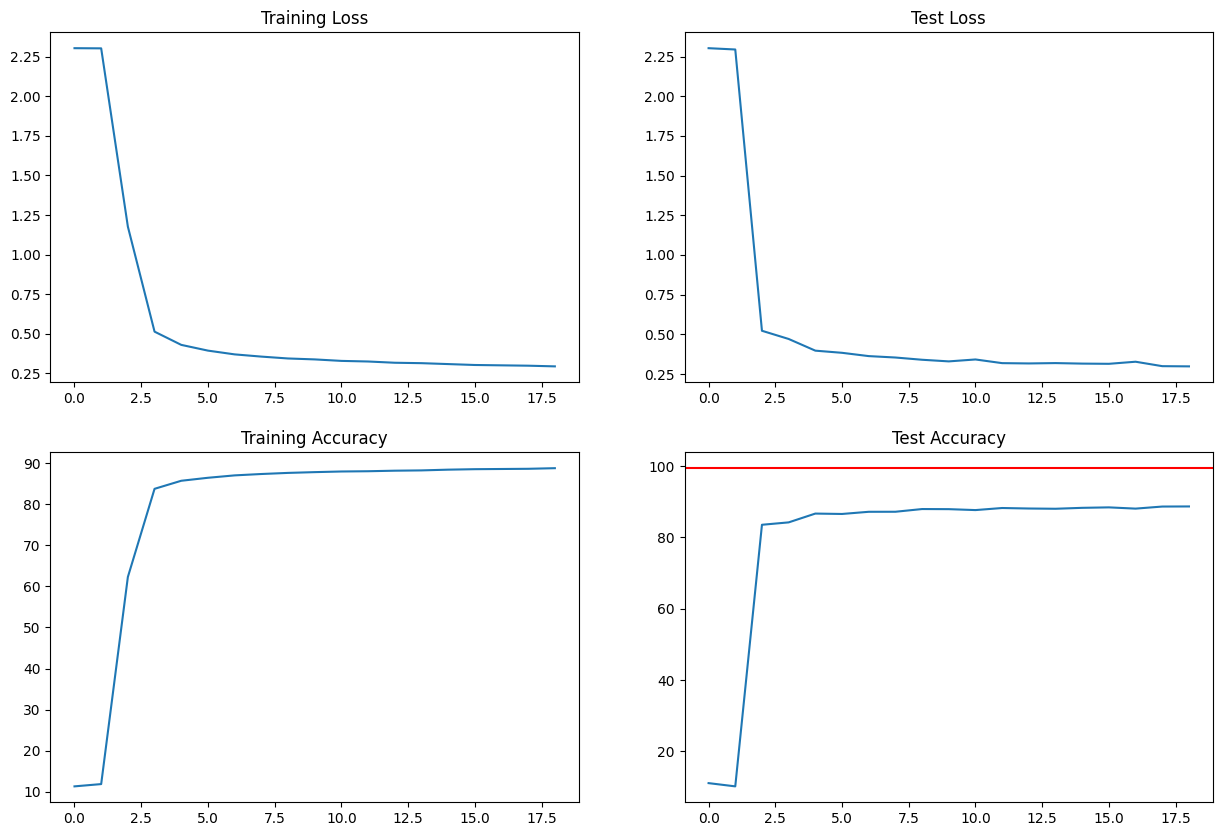

In [8]:
plot_statistics(train_losses, train_acc, test_losses, test_acc)